<a href="https://colab.research.google.com/github/jadams156530/CS4410/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

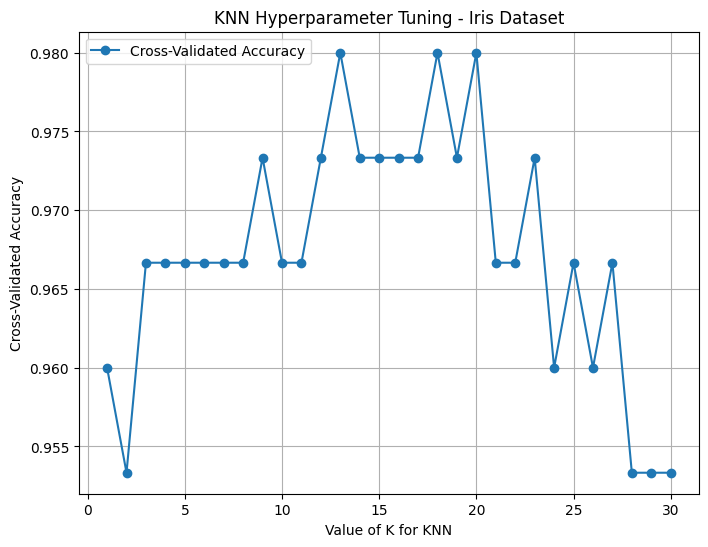

Best parameters found by GridSearchCV: {'n_neighbors': 13}
Cross-validated accuracy with best parameters: 0.9800000000000001


In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target
k_range = range(1, 31)
cv_accuracy = []

# Perform cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cv_accuracy.append(scores.mean())

# Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, cv_accuracy, marker='o', linestyle='-', label='Cross-Validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning - Iris Dataset')
plt.grid(True)
plt.legend()
plt.show()

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_range}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

grid_search.fit(X, y)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Cross-validated accuracy with best parameters:", grid_search.best_score_)
